In [1]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
import random
import seaborn as sns
import itertools as it

from metric_voting import *
from metric_voting.plotting import *

%load_ext autoreload
%autoreload 2

In [12]:
# Colors for plotting!
colors = ["#0099cd","#ffca5d","#00cd99","#99cd00","#cd0099","#9900cd","#8dd3c7",
        "#bebada","#fb8072","#80b1d3","#fdb462","#b3de69","#fccde5","#bc80bd",
        "#ccebc5","#ffed6f","#ffffb3","#a6cee3","#1f78b4","#b2df8a","#33a02c",
        "#fb9a99","#e31a1c","#fdbf6f","#ff7f00","#cab2d6","#6a3d9a","#b15928",
        "#64ffda","#00B8D4","#A1887F","#76FF03","#DCE775","#B388FF","#FF80AB",
        "#D81B60","#26A69A","#FFEA00","#6200EA",
    ]

colors2 = colors[:6] + [colors[8]] + [colors[9]] +colors[-6:]

colors3 = colors2[:4] + [colors2[5]] + colors2[7:]

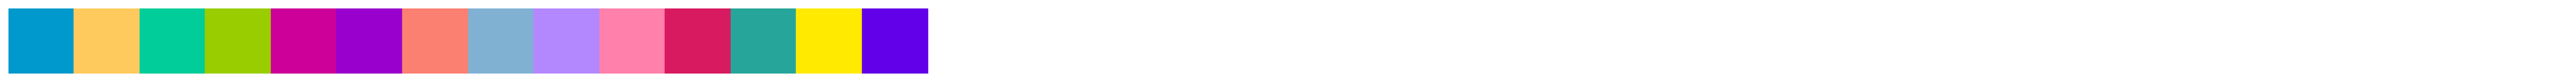

In [3]:
# Create a figure and axis
fig, ax = plt.subplots(figsize=(len(colors), 1))

# Create a horizontal color bar
for i, color in enumerate(colors2):
    ax.add_patch(plt.Rectangle((i, 0), 1, 1, color=color))

# Set limits and remove axes
ax.set_xlim(0, len(colors))
ax.set_ylim(0, 1)
ax.axis("off")

plt.show()

In [4]:
plt.rcParams.update({
    "pgf.texsystem": "pdflatex",
    "font.family": "serif",
    "font.serif": [],
    "text.usetex": True,
    "pgf.rcfonts": False,
    "font.size": 22
})

In [5]:
experiment_name = 'two_bloc/10k_voters_200_cands'

### Example inefficiency

In [6]:
f = '../data/' + experiment_name + '/example_ineff.npz'
loaded_data = np.load(f, allow_pickle = True)
example_dict = {key: loaded_data[key] for key in loaded_data.files}

for ky,vl in example_dict.items():
    if ky not in ['voters', 'candidates']:
        example_dict[ky] = vl.item()

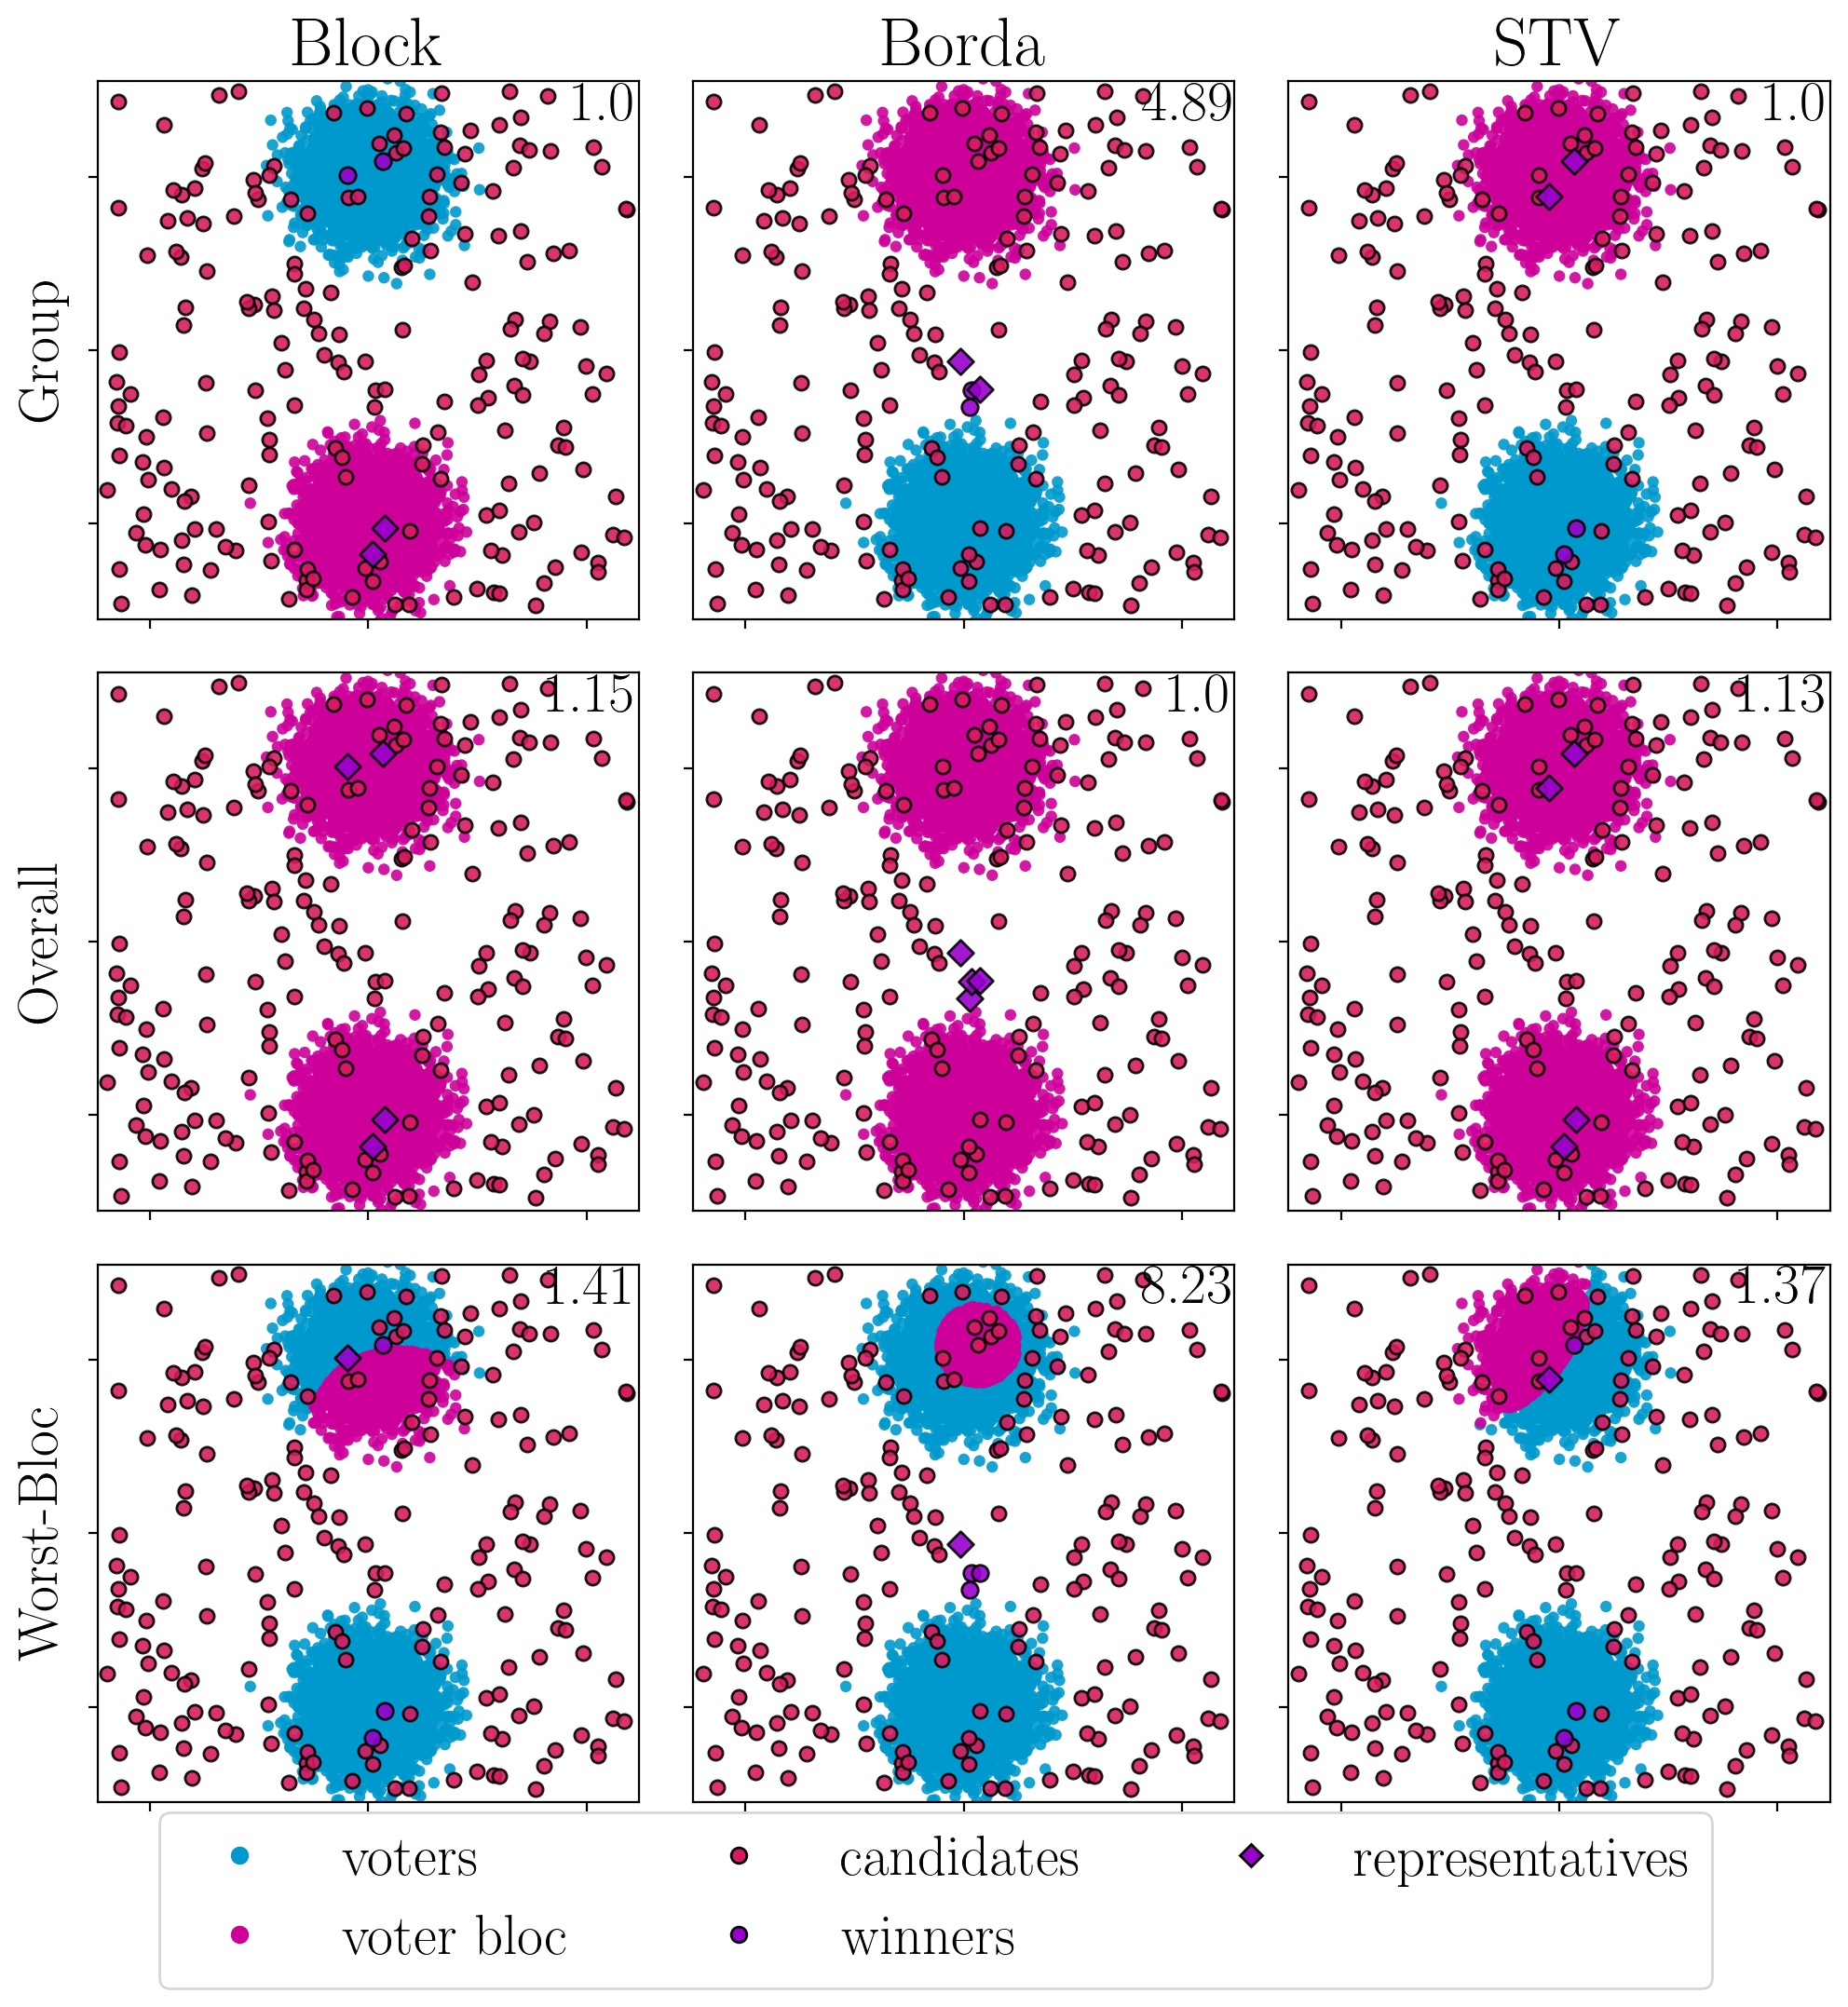

In [7]:
voter_color = colors2[0]
#candidate_color = colors2[9]
candidate_color = colors2[10]
winner_color = colors2[5]
bloc_color = colors2[4]
reps_color = winner_color

output_file = '../figures/' + experiment_name + '/example_ineff.png'
#output_file = None
plot_ineff_example(
    results = example_dict,
    fig_params = {'figsize' : (12, 12), 'dpi' : 200},
    colors = [voter_color, candidate_color, winner_color, bloc_color, reps_color],
    output_file = output_file
)

### Group, Overall, Worst bloc Inefficiency

In [8]:
f = '../data/' + experiment_name + '/samples.npz'
loaded_data = np.load(f)
result_dict = {key: loaded_data[key] for key in loaded_data.files}
n_samples = result_dict['voters'].shape[0]

In [20]:
result_dict['voters']

array([[[-0.10887693, -2.18846856],
        [-0.20763666, -2.05006475],
        [ 0.20694338, -2.5168819 ],
        ...,
        [ 0.11480596,  1.89912292],
        [-0.55947207,  1.97458335],
        [ 0.10756564,  1.92976981]],

       [[-0.10887693, -2.18846856],
        [-0.20763666, -2.05006475],
        [ 0.20694338, -2.5168819 ],
        ...,
        [ 0.11480596,  1.89912292],
        [-0.55947207,  1.97458335],
        [ 0.10756564,  1.92976981]],

       [[-0.10887693, -2.18846856],
        [-0.20763666, -2.05006475],
        [ 0.20694338, -2.5168819 ],
        ...,
        [ 0.11480596,  1.89912292],
        [-0.55947207,  1.97458335],
        [ 0.10756564,  1.92976981]],

       ...,

       [[-0.10887693, -2.18846856],
        [-0.20763666, -2.05006475],
        [ 0.20694338, -2.5168819 ],
        ...,
        [ 0.11480596,  1.89912292],
        [-0.55947207,  1.97458335],
        [ 0.10756564,  1.92976981]],

       [[-0.10887693, -2.18846856],
        [-0.20763666, -2.05

In [19]:
np.sum(result_dict['SNTV'], axis = 0)

array([    0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0, 10000,     0, 10000,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,

In [37]:
f = '../data/' + experiment_name + '/worst_bloc.npz'
loaded_data = np.load(f)
worst_bloc_dict = {key: loaded_data[key] for key in loaded_data.files}

In [9]:
##############################################################################################################
# Compute results:
elections = [_ for _ in result_dict.keys() if _ not in ['voters', 'candidates', 'voter_labels', 'candidate_labels']]

# 1) Using known group labels
group_ineff_samples = {e : np.zeros(n_samples) for e in elections}
# 2) Or instead treat everyone as one group
overall_ineff_samples = {e : np.zeros(n_samples) for e in elections}
# 3) Or for the estimated worst case voter block
#worst_ineff_samples = {e : np.zeros(n_samples) for e in elections}

group_select = 0
for i in range(n_samples):
    voter_positions = result_dict['voters'][i]
    candidate_positions = result_dict['candidates'][i]
    cst_array = euclidean_cost_array(voter_positions, candidate_positions)
    
    group_labels = result_dict['voter_labels'][i]
    overall_labels = np.zeros(len(group_labels))
    
    for j, e in enumerate(elections):
        winner_indices = np.where(result_dict[e][i])[0]
        #worst_labels = worst_bloc_dict[e][i]
        
        grp_ineff = group_inefficiency(cst_array, winner_indices, group_labels, group_select)
        ovr_ineff = group_inefficiency(cst_array, winner_indices, overall_labels, 0)
        #wrst_ineff = group_inefficiency(cst_array, winner_indices, worst_labels, 1)
        
        group_ineff_samples[e][i] = grp_ineff
        overall_ineff_samples[e][i] = ovr_ineff
        #worst_ineff_samples[e][i] = wrst_ineff
        
#group_data = np.array([values[~np.isnan(values)] for values in group_ineff_samples.values()])
#overall_data = np.array([values[~np.isnan(values)] for values in overall_ineff_samples.values()])
#worst_data = np.array([values[~np.isnan(values)] for values in worst_ineff_samples.values()])
group_data = np.array([values for values in group_ineff_samples.values()])
overall_data = np.array([values for values in overall_ineff_samples.values()])
#worst_data = np.array([values for values in worst_ineff_samples.values()])
labels = ['CC' if e == 'ChamberlinCourant' else e for e in elections]
labels = ['Expanding' if e == 'ExpandingApprovals' else e for e in labels]
labels = ['Block' if e == 'Bloc' else e for e in labels]
##########################################################################################################

NameError: name 'group_data' is not defined

In [10]:
group_data = np.array([values for values in group_ineff_samples.values()])
overall_data = np.array([values for values in overall_ineff_samples.values()])
#worst_data = np.array([values for values in worst_ineff_samples.values()])
labels = ['CC' if e == 'ChamberlinCourant' else e for e in elections]
labels = ['Expanding' if e == 'ExpandingApprovals' else e for e in labels]
labels = ['Block' if e == 'Bloc' else e for e in labels]

In [15]:
pd.DataFrame(group_data)

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,...,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,...,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092
3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
4,2.057314,2.057314,2.057314,2.057314,2.057314,2.057314,2.057314,2.057314,2.057314,2.057314,...,2.057314,2.057314,2.057314,2.057314,2.057314,2.057314,2.057314,2.057314,2.057314,2.057314
5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
6,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,...,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092,3.003092
7,2.563045,5.612874,2.563045,2.563045,2.563045,2.563045,5.612874,5.612874,2.563045,2.563045,...,5.612874,5.612874,2.563045,5.612874,2.563045,5.612874,2.563045,5.612874,5.612874,2.563045
8,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,...,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166,1.168166
9,1.082933,4.298792,1.000000,1.000000,1.082933,1.082933,7.734930,1.658453,1.625391,1.000000,...,1.000000,1.000000,1.186277,3.685109,3.841326,1.168166,1.168166,4.590842,1.148837,1.067082


Text(0, 0.5, 'Group-Inefficiency')

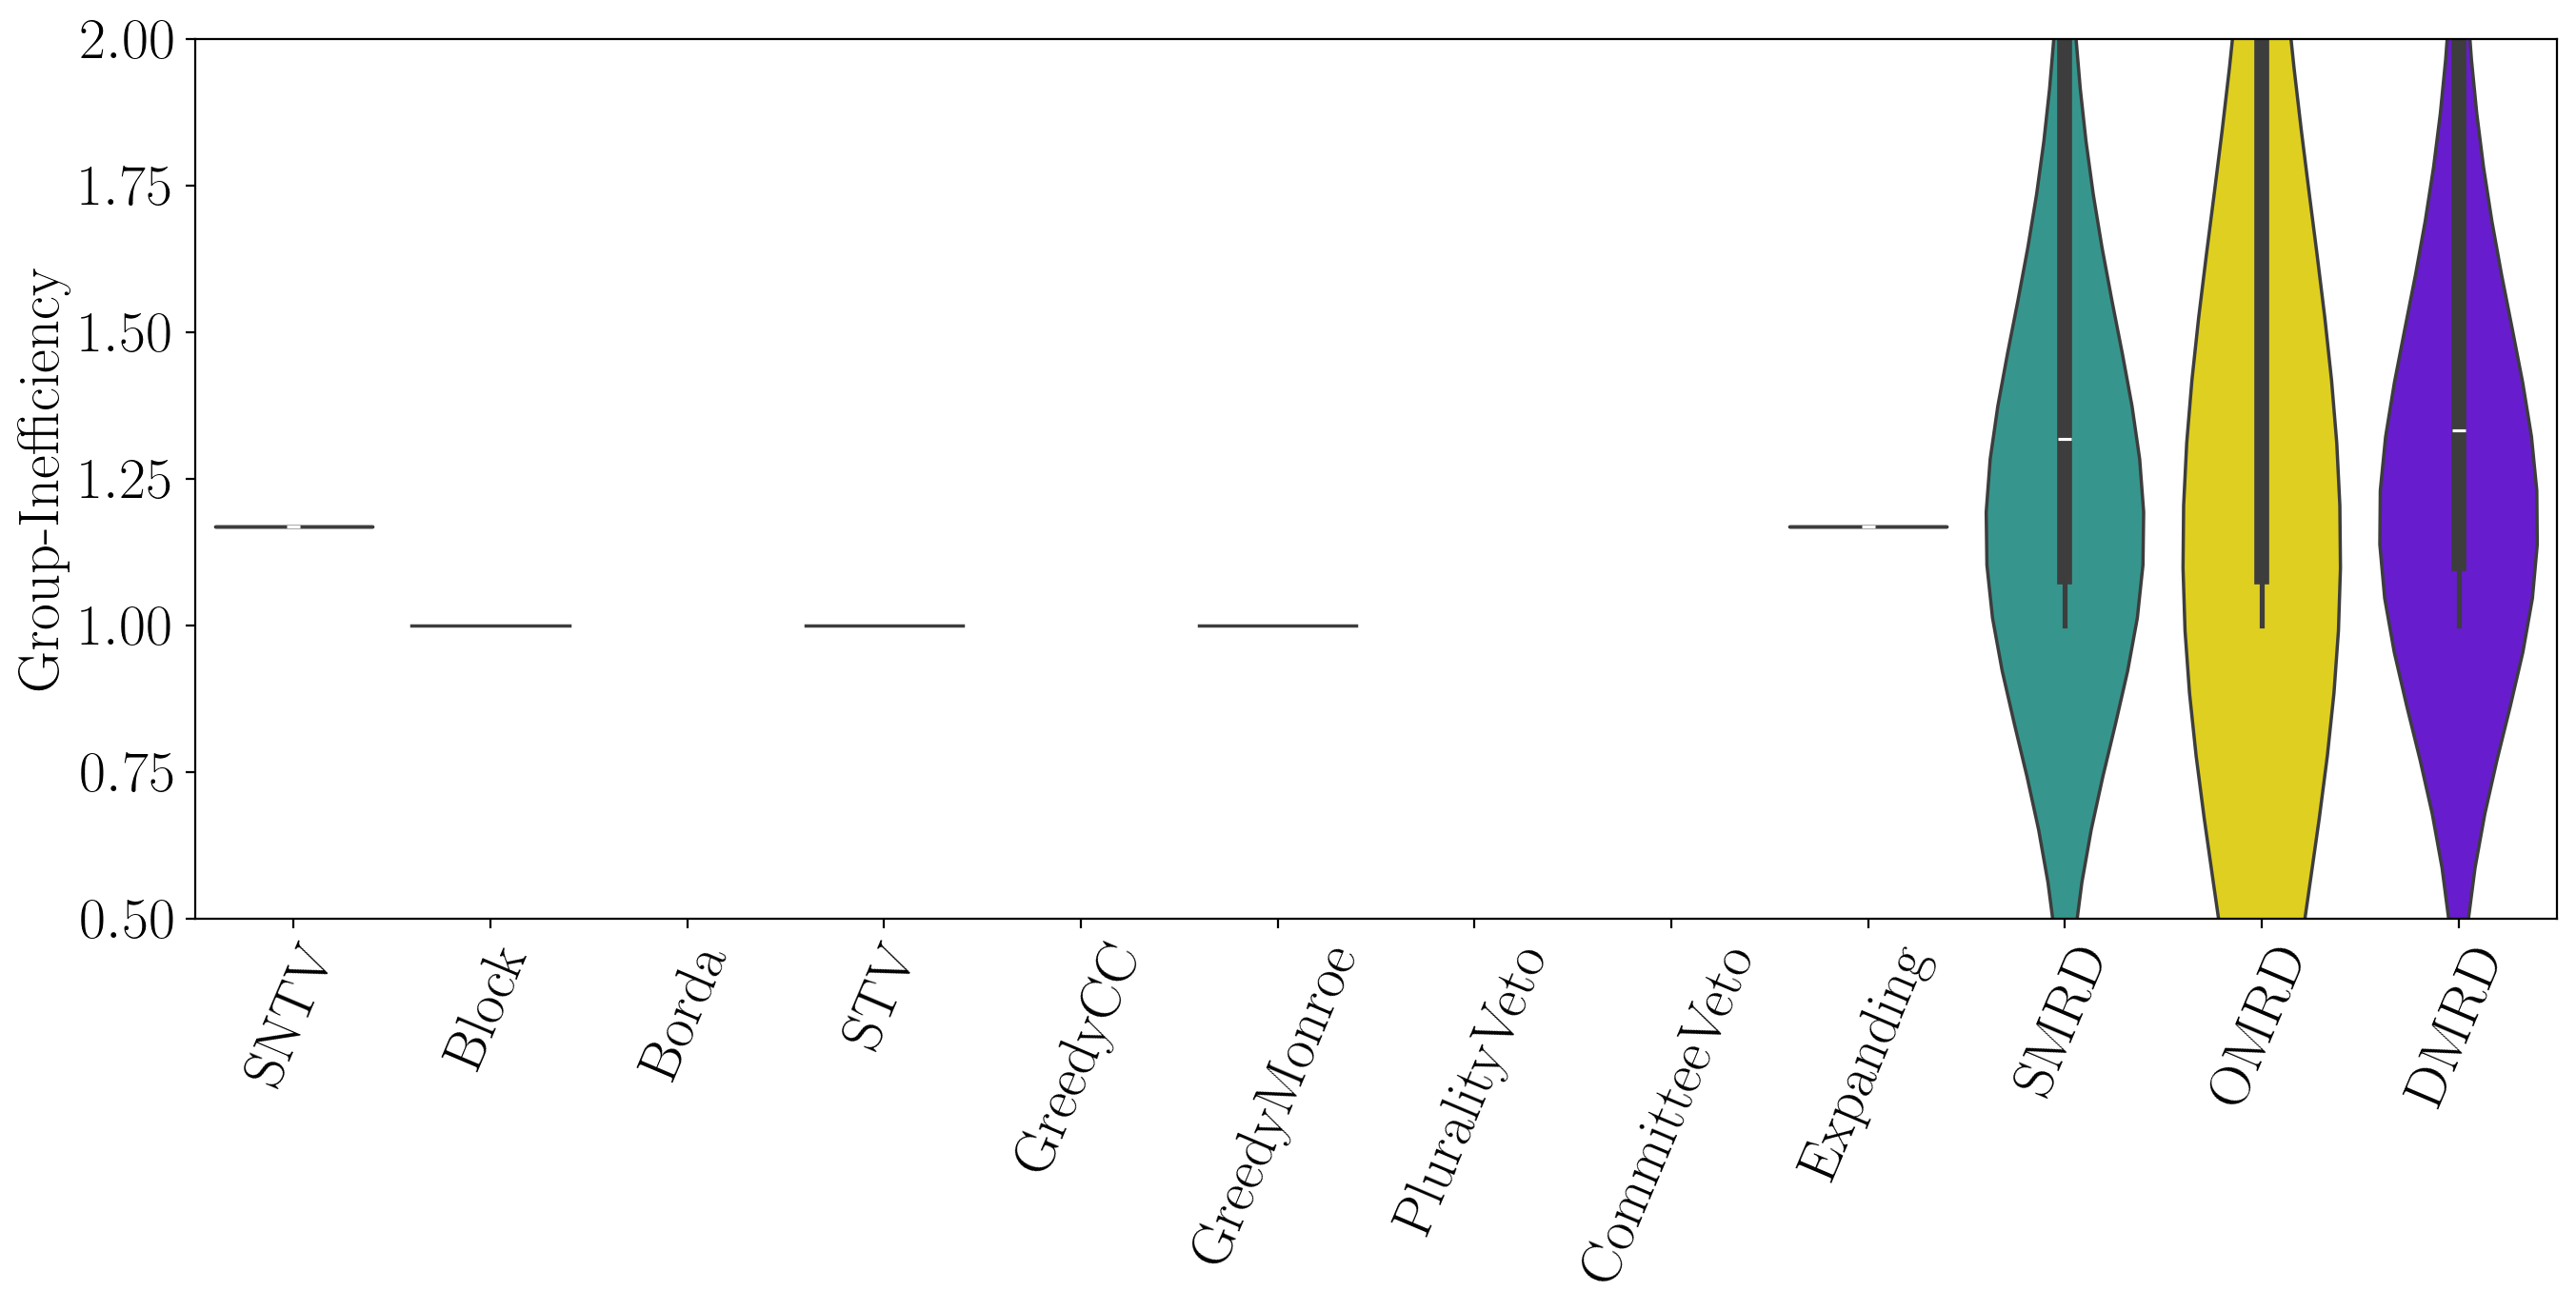

In [13]:
#########################################################################################################################
# Plot Group Inefficiency Analysis:
plt.figure(figsize=(16, 6), dpi = 200)

ax = sns.violinplot(data=group_data.T, palette = colors3, alpha = 1, width = 0.8)
for violin in ax.collections:
    violin.set_alpha(1)
    
ax.set_ylim(0.5, 2)
#ax.set_ylim(0.95,1.05)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=67)
plt.ylabel('group-inefficiency'.title())
#plt.savefig('../figures/' + experiment_name + '/group_ineff.png', dpi = 200, bbox_inches = 'tight')
#####################################################################################################################

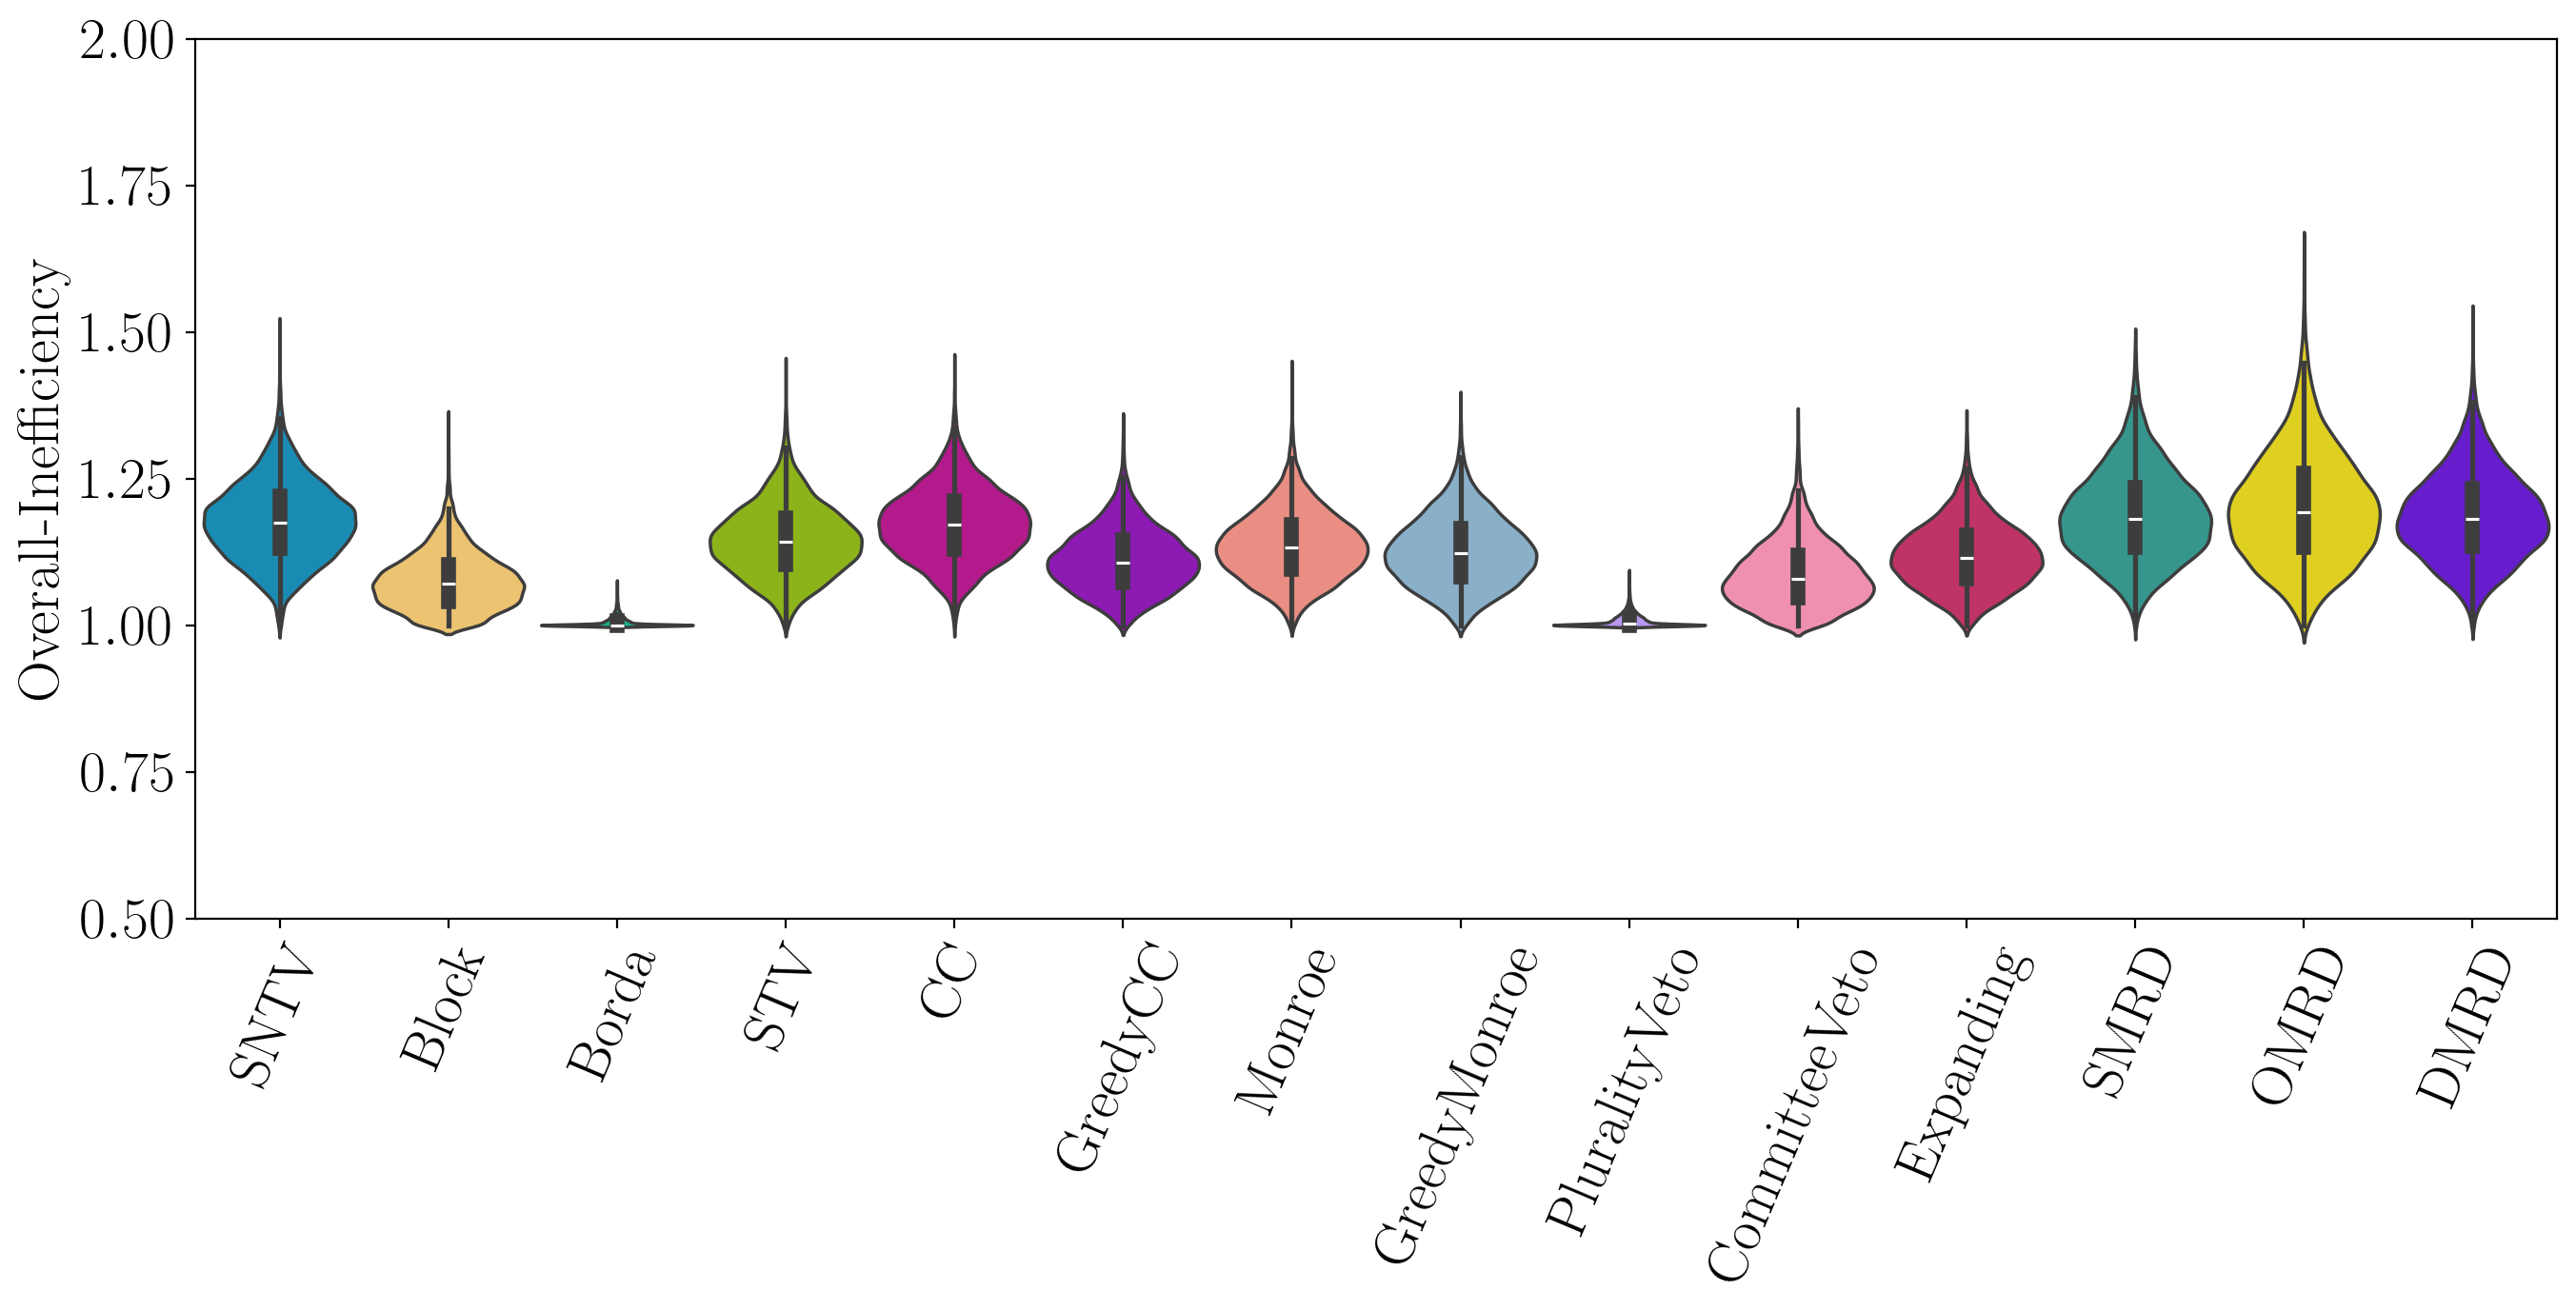

In [14]:
##################################################################################################
# Plot Overall Inefficiency Analysis:
plt.figure(figsize=(16, 6), dpi = 200)

ax = sns.violinplot(data=overall_data.T, palette = colors2, alpha = 1, width = 0.9)
for violin in ax.collections:
    violin.set_alpha(1)
    
ax.set_ylim(0.5, 2)
#ax.set_ylim(0.95, 1.05)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=67)
plt.ylabel('overall-inefficiency'.title())
plt.savefig('../figures/' + experiment_name + '/overall_inef.png', dpi = 200, bbox_inches = 'tight')
#################################################################################################33

Text(0, 0.5, 'Worst-Bloc-Inefficiency')

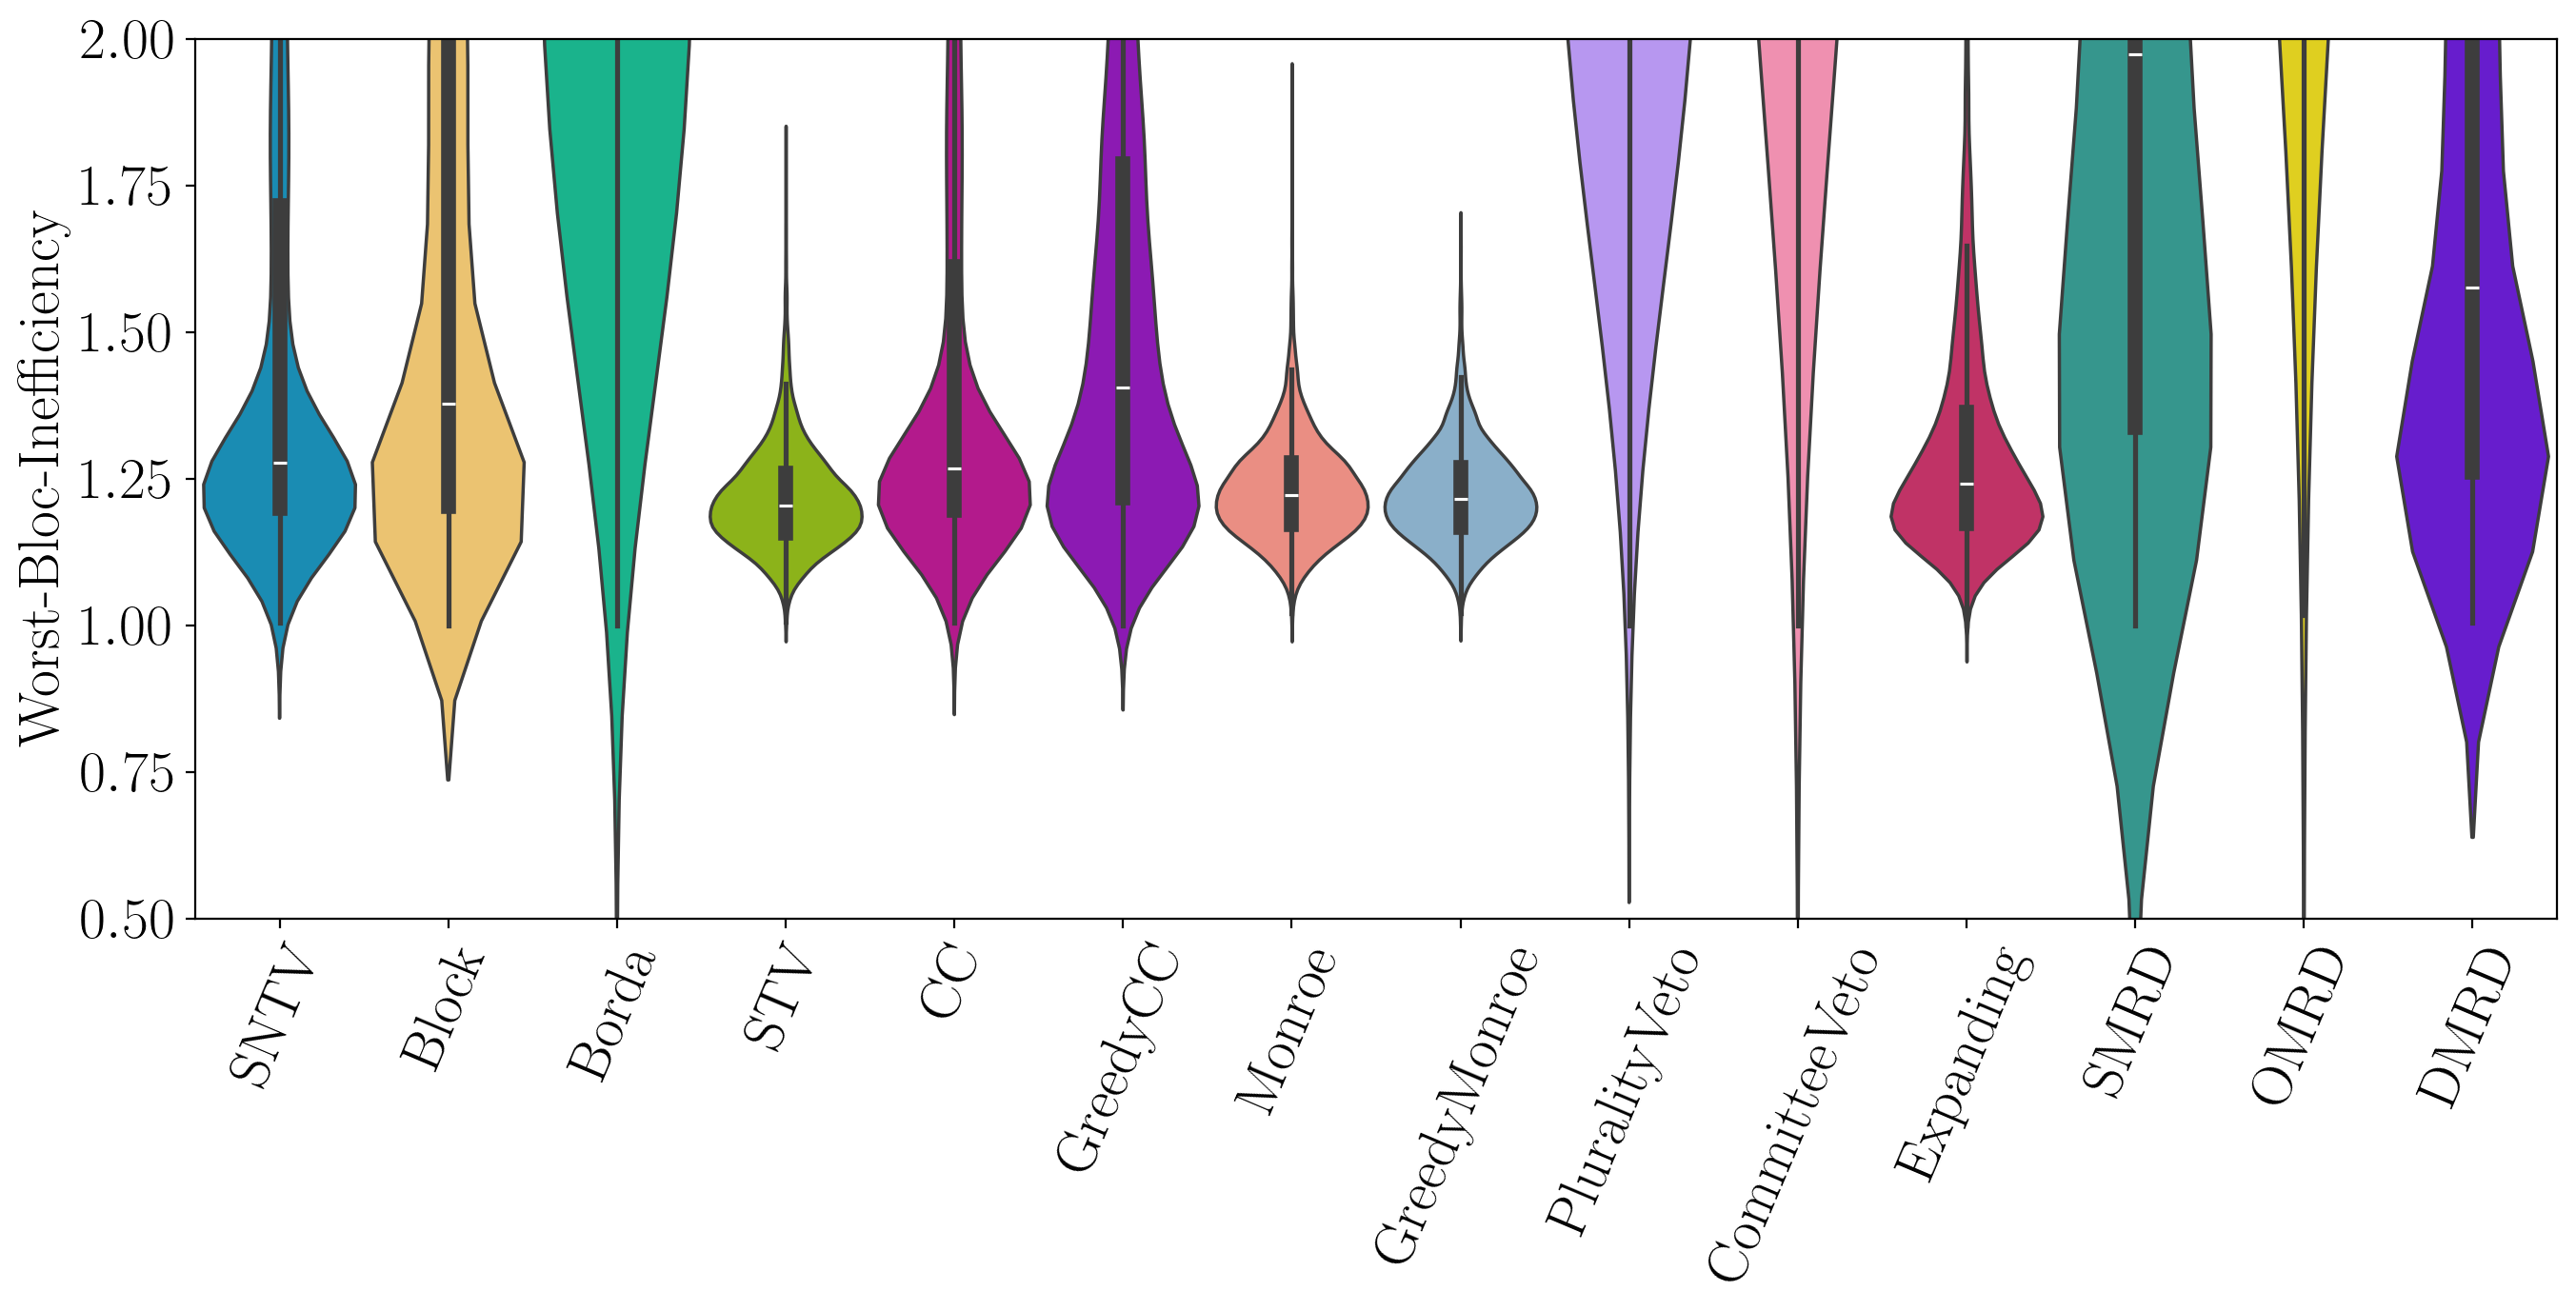

In [88]:
#################################################################################################
# Plot worst Inefficiency Analysis:
plt.figure(figsize=(16, 6), dpi = 200)

ax = sns.violinplot(data=worst_data.T, palette = colors2, alpha = 1, width = 0.9)
for violin in ax.collections:
    violin.set_alpha(1)
    
ax.set_ylim(0.5, 2)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, rotation=67)
plt.ylabel('Worst-Bloc-Inefficiency')
#plt.savefig('../figures/' + experiment_name + '/worst_group_inef.png', dpi = 200, bbox_inches = 'tight')
################################################################################################

## Heatmaps

In [24]:
np.random.choice(range(10), size = 5, replace = True)

array([1, 7, 9, 4, 7])

In [121]:
election_method = 'Borda'
cand_pos = result_dict['candidates']
res = result_dict[election_method]
winners = cand_pos[res]

# Define grid size
grid_size = 3
n_bins = grid_size + 1
xedges = yedges = np.linspace(-3,3, n_bins)

#### Share of winners by grid cell

In [122]:
# Create histogram of winners:
H, xedges, yedges = np.histogram2d(x = winners[:,0], y = winners[:,1], bins = [xedges, yedges])
H = H.T[::-1, :]
H /= len(winners)

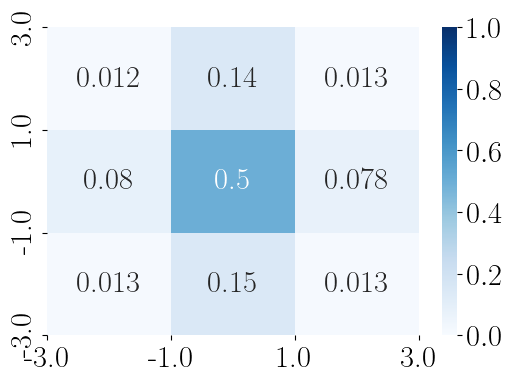

In [123]:
fig, ax = plt.subplots(figsize=(6, 4))
xlabels = np.round(xedges, 2)
ylabels = np.round(yedges, 2)[::-1]
sns.heatmap(
    H,
    vmin = 0.0,
    vmax = 1,
    cmap = "Blues",
    annot = True
)
xlabels = np.round(xedges, 2)
ylabels = np.round(yedges, 2)[::-1]
ax.set_xticks(np.arange(0,n_bins))
ax.set_xticklabels(xlabels)
ax.set_yticks(np.arange(0,n_bins))
ax.set_yticklabels(ylabels)
plt.savefig('../figures/' + experiment_name + '/' + election_method + '_share_of_winners.png', dpi = 200, bbox_inches = 'tight')

#### Share of elections with at least one winner in each grid cell

In [124]:
winner_groups = np.array([cand_pos[i][res[i]] for i in range(len(cand_pos))])
group_H = np.zeros((n_bins - 1, n_bins - 1))
for G in winner_groups:
    gH = np.zeros((n_bins - 1, n_bins - 1))
    for c in G:
        xbin = np.digitize(c[0], bins = xedges) - 1
        ybin = (n_bins - np.digitize(c[1], bins = yedges)) - 1
        gH[xbin,ybin] = 1
    group_H += gH
group_H /= len(winner_groups)
group_H = group_H.T

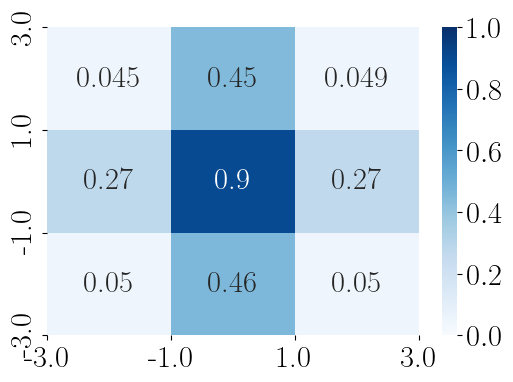

In [125]:
fig, ax = plt.subplots(figsize=(6, 4))
xlabels = np.round(xedges, 2)
ylabels = np.round(yedges, 2)[::-1]
sns.heatmap(
    group_H,
    vmin = 0.0,
    vmax = 1,
    cmap = "Blues",
    annot = True
)
xlabels = np.round(xedges, 2)
ylabels = np.round(yedges, 2)[::-1]
ax.set_xticks(np.arange(0,n_bins))
ax.set_xticklabels(xlabels)
ax.set_yticks(np.arange(0,n_bins))
ax.set_yticklabels(ylabels)
plt.savefig('../figures/' + experiment_name + '/' + election_method + '_share_of_elex_with_winner.png', dpi = 200, bbox_inches = 'tight')

### Varying Sizes Plot

In [73]:
n_voters = 1000
group_sizes = [[1000 - i, i] for i in range(0, 1050, 50)]
bloc_label = 0
num_sizes = len(group_sizes)
n_samples = 1000

elections_list = [
    SNTV,
    Bloc,
    Borda,
    STV,
    ChamberlinCourant,
    GreedyCC,
    Monroe,
    GreedyMonroe, 
    #PAV,
    PluralityVeto,
    CommitteeVeto, 
    ExpandingApprovals,
    SMRD,
    OMRD,
    DMRD
]

stats_group_ineff_by_size = {e.__name__:(np.zeros(num_sizes), np.zeros(num_sizes)) for e in elections_list}
stats_overall_ineff_by_size = {e.__name__:(np.zeros(num_sizes), np.zeros(num_sizes)) for e in elections_list}

for s in range(num_sizes):
    f = '../data/' + experiment_name + '/samples' + str(s) + '.npz'
    loaded_data = np.load(f)
    result_dict = {key: loaded_data[key] for key in loaded_data.files}
    
    s_group_ineffs = {e.__name__:np.zeros(n_samples) for e in elections_list}
    s_overall_ineffs = {e.__name__:np.zeros(n_samples) for e in elections_list}
    
    for i in range(n_samples):
        voter_positions = result_dict['voters'][i]
        candidate_positions = result_dict['candidates'][i]
        labels = result_dict['voter_labels'][i]
        labels_overall = np.zeros(len(labels)) + bloc_label
        cst_array = euclidean_cost_array(voter_positions, candidate_positions)

        for j,E in enumerate(elections_list):
            name = E.__name__
            winners = np.where(result_dict[name][i])[0]
            group_ineff = group_inefficiency(cst_array, winners, labels, bloc_label)
            overall_ineff = group_inefficiency(cst_array, winners, labels_overall, bloc_label)
            s_group_ineffs[name][i] = group_ineff
            s_overall_ineffs[name][i] = overall_ineff
            
    for ename, ineff_vals in s_group_ineffs.items():
        stats_group_ineff_by_size[ename][0][s] = np.mean(ineff_vals)
        stats_group_ineff_by_size[ename][1][s] = np.std(ineff_vals)
        
    for ename, ineff_vals in s_overall_ineffs.items():
        stats_overall_ineff_by_size[ename][0][s] = np.mean(ineff_vals)
        stats_overall_ineff_by_size[ename][1][s] = np.std(ineff_vals)

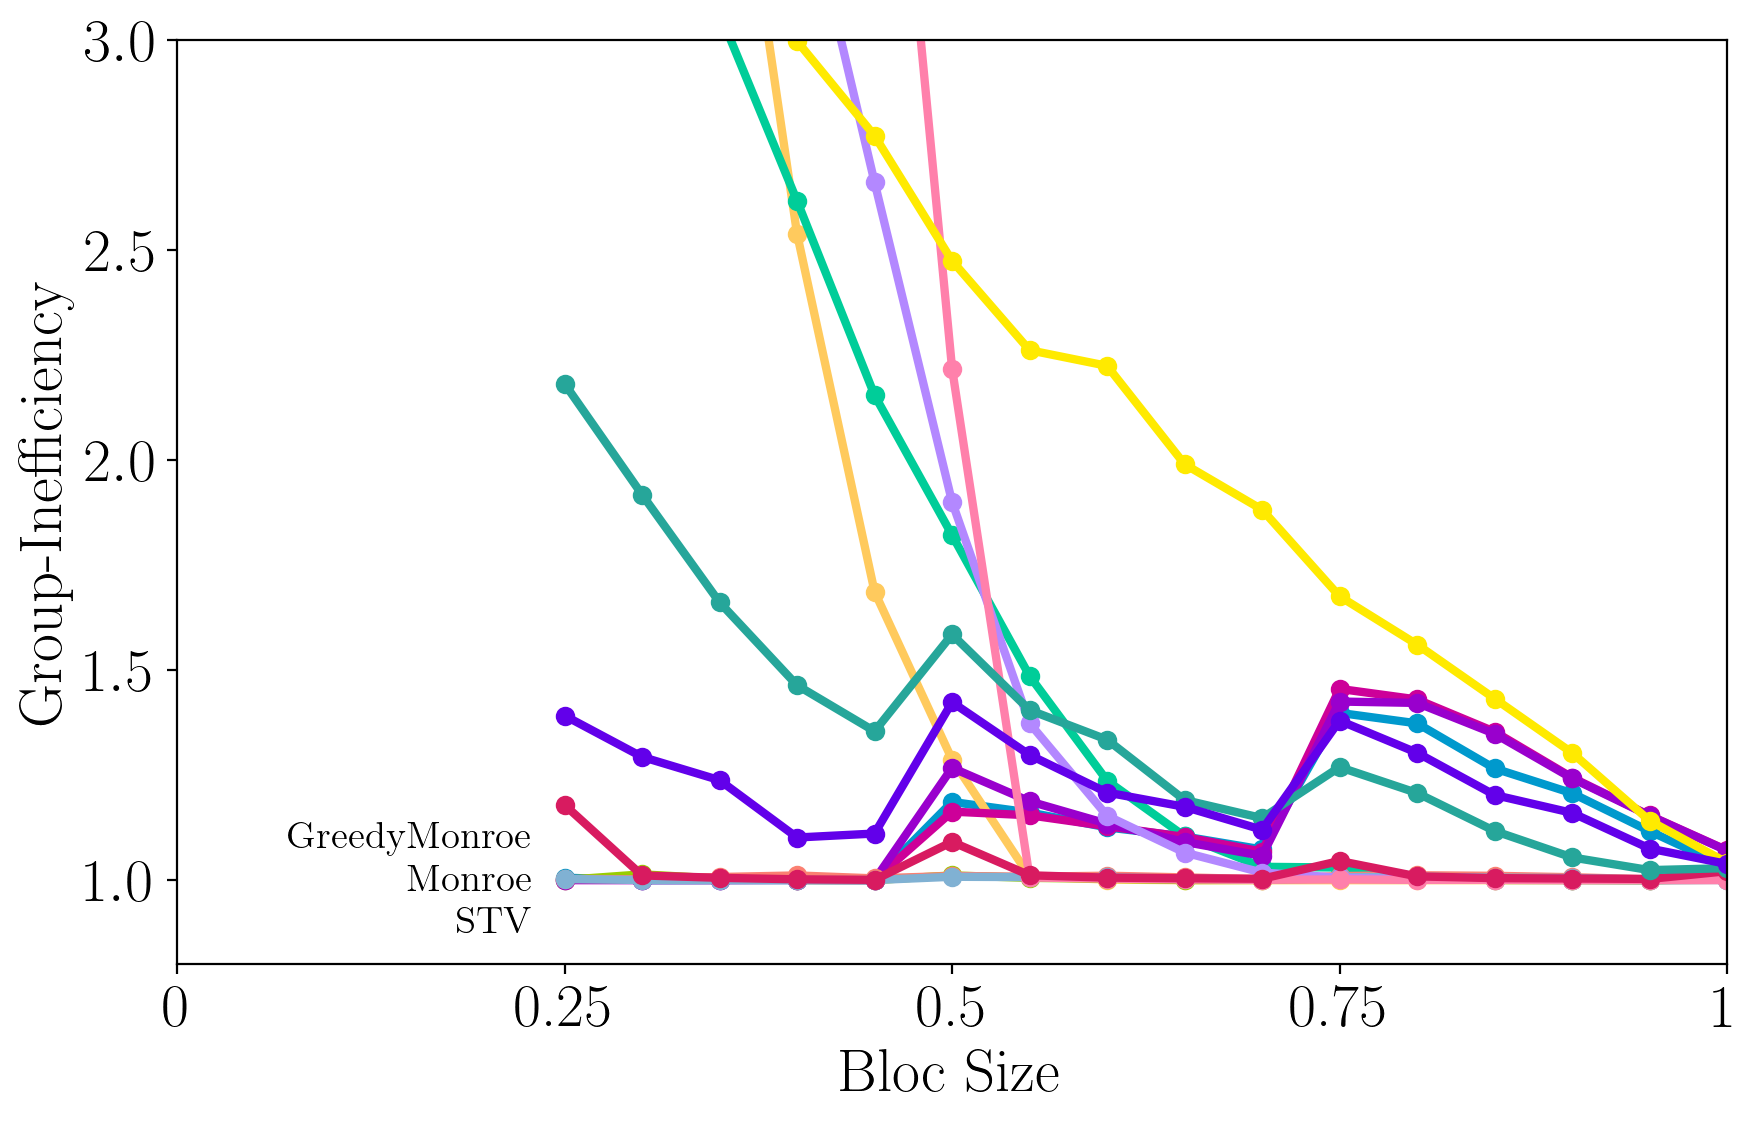

In [74]:
###############################################################################################
# 1) Plot group inefficiency analysis.
fig,ax = plt.subplots(figsize=(10, 6), dpi = 200)

fractional_sizes = [size[bloc_label]/n_voters for size in group_sizes][::-1]

for i, (ename,ineff_vals) in enumerate(stats_group_ineff_by_size.items()):
    # Reversing the order to look at what happened as bloc 0 grew
    avg_ineff_vals = ineff_vals[0][::-1]
    # skipping the first five indices since inefficiency is undefined there. 
    ax.plot(fractional_sizes[5:], avg_ineff_vals[5:], label=ename, color = colors2[i], linewidth = 3, marker = 'o', alpha = 1)

ax.set_xlim(0, 1)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'])
ax.set_ylabel('group-inefficiency'.title())
ax.set_xlabel('Bloc size'.title())
#plt.legend(fontsize = 12, loc = 'upper left')
ax.set_ylim(0.8,3)

ax.annotate(
    'GreedyMonroe', 
    xy = (0.25, 1),
    xytext = (0.23, 1.1),  
    ha="right",  
    va="center",  
    rotation = 0,
    fontsize=14
)

ax.annotate(
    'Monroe', 
    xy = (0.25, 1),
    xytext = (0.23, 1),  
    ha="right",  
    va="center",  
    rotation = 0,
    fontsize=14
)

ax.annotate(
    'STV', 
    xy = (0.25, 1),
    xytext = (0.23, 0.9),  
    ha="right",  
    va="center",  
    rotation = 0,
    fontsize=14
)
        
#plt.savefig('../figures/' + experiment_name + '/group_ineff.png', dpi = 200, bbox_inches = 'tight')
plt.show()

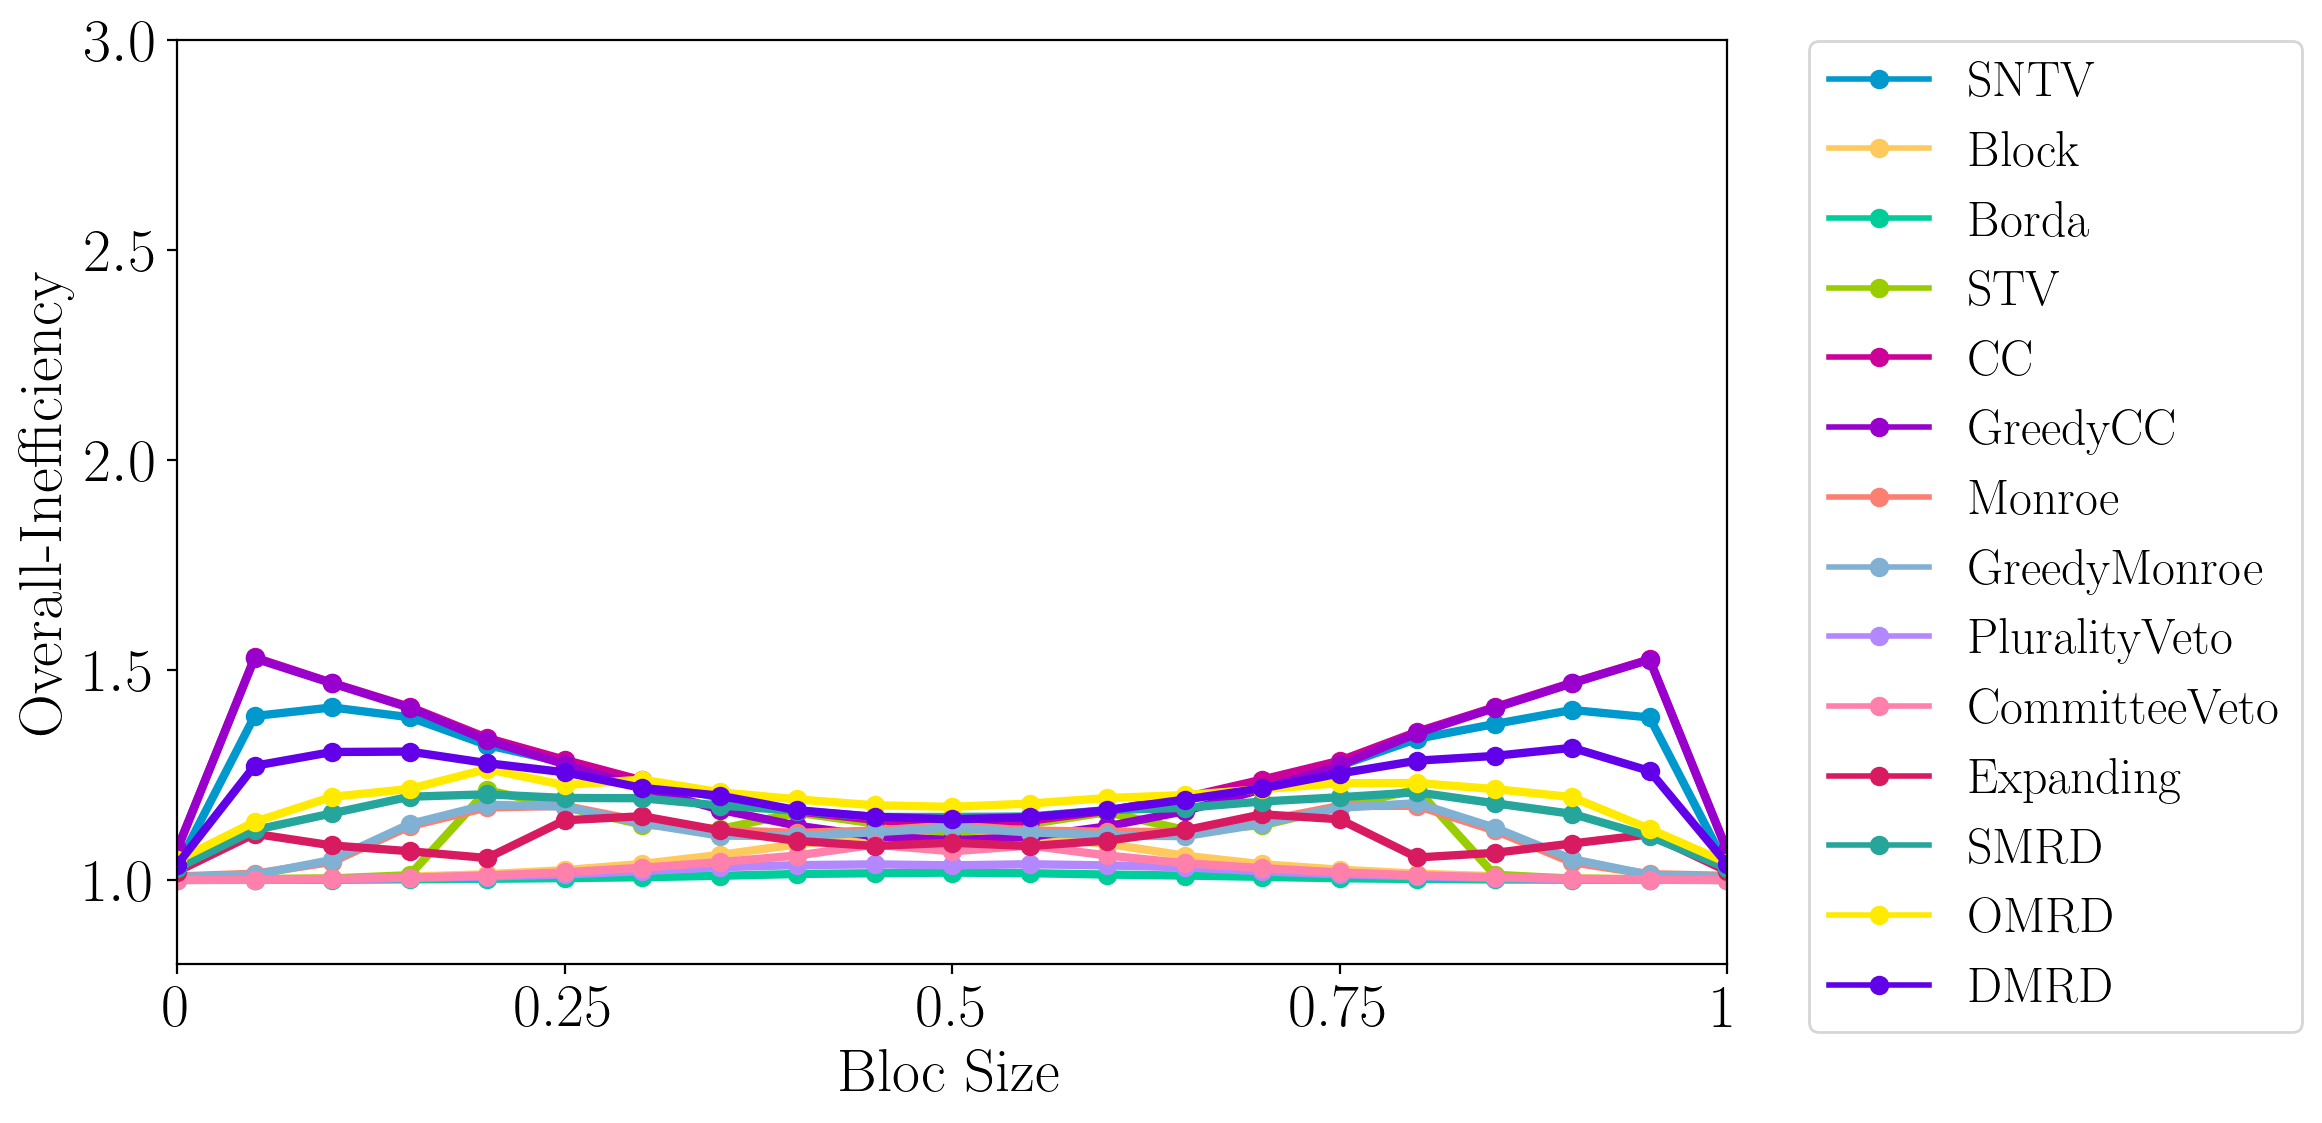

In [75]:
###############################################################################################################
# 2) Plot overall in-efficiency analysis.
fig,ax = plt.subplots(figsize=(10, 6), dpi = 200)

fractional_sizes = [size[bloc_label]/n_voters for size in group_sizes][::-1]

for i, (ename,ineff_vals) in enumerate(stats_overall_ineff_by_size.items()):
    # Reversing the order to look at what happened as bloc 0 grew
    avg_ineff_vals = ineff_vals[0][::-1]
    ax.plot(fractional_sizes, avg_ineff_vals, label=ename, color = colors2[i], linewidth = 3, marker = 'o', alpha = 1)

plt.ylabel('overall-inefficiency'.title())
plt.xlabel('Bloc size'.title())

names = [ename for ename in size_avg_represent_overall.keys()]
names = ['CC' if n == 'ChamberlinCourant' else n for n in names]
names = ['Expanding' if n == 'ExpandingApprovals' else n for n in names]
names = ['Block' if n == 'Bloc' else n for n in names]
legend_elements = [Line2D([0], [0], marker = 'o', color=colors2[i], lw=2, label=names[i]) for i in range(len(names))]

ax.set_xlim(0, 1)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xticklabels(['0', '0.25', '0.5', '0.75', '1'])
fig.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.2, 0.9), ncol=1, fontsize = 18)
ax.set_ylim(0.8,3)
#plt.savefig('../figures/' + experiment_name + '/overall_ineff.png', dpi = 200, bbox_inches = 'tight')
plt.show()